In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)



# Part2:Factors
### Mean Vol Sharpe VaR(0.05)

In [286]:
df = pd.read_excel('dfa_analysis_data.xlsx',sheet_name = 'factors')
df = df.set_index('Date')
factors = df.drop('RF',axis =1)
factors





,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382
1926-09-30,0.0036,-0.0140,0.0013
1926-10-31,-0.0324,-0.0009,0.0070
1926-11-30,0.0253,-0.0010,-0.0051
...,...,...,...
2022-04-30,-0.0946,-0.0141,0.0619
2022-05-31,-0.0034,-0.0185,0.0841
2022-06-30,-0.0843,0.0209,-0.0597


## Now calculate their performance statistics

In [82]:
def cal_performance(df,annaul_fac):

    mean = df.mean() * annual_fac
    vol = df.std()*np.sqrt(annual_fac)
    sharpe = df.mean() * annual_fac/(df.std()*np.sqrt(annual_fac))
    VaR = df.quantile(0.05)
    ss = mean.to_frame(name = 'Mean').join(vol.to_frame(name='Vol')).join(sharpe.to_frame(name='sharpe')).join(VaR.to_frame(name='VaR 0.05'))
    return ss.T
print("From 1926 to 1980")
cal_performance(factors[:"1980"],12)  

From 1926 to 1980


,Mkt-RF,SMB,HML
Mean,0.0811,0.0340,0.0495
Vol,0.2051,0.1146,0.1338
sharpe,0.3957,0.2966,0.3697
VaR 0.05,-0.0840,-0.0434,-0.0429


In [83]:
print("From 1981 to 2001")
cal_performance(factors['1981':"2001"],12)


From 1981 to 2001


,Mkt-RF,SMB,HML
Mean,0.0773,-0.0009,0.0637
Vol,0.1574,0.1184,0.1113
sharpe,0.4908,-0.0074,0.5727
VaR 0.05,-0.0645,-0.0466,-0.0418


In [86]:
print("From 2002 to 2022")
cal_performance(factors['2002':"2022"],12)

From 2002 to 2022


,Mkt-RF,SMB,HML
Mean,0.0833,0.0196,0.0017
Vol,0.1540,0.0858,0.1045
sharpe,0.5409,0.2288,0.0161
VaR 0.05,-0.0788,-0.0378,-0.0410


## 2a) Does each factor have a premium (positive expected excess return) in each subsample?
No, we can observe that the size factor had a negative expected excess return from 1981 to 2001.
## (b) Does the premium to the size factor get smaller after 1980?
Yes, the premium drops from 0.0340 to -0.0009 from 1981 to 2001 and then back to 0.0196 from 2002 - 2022.
## (c) Does the premium to the value factor get smaller during the 1990's?
It started high from 1981 but turned to be much smaller when it came to 2002. So Yes.
## (d) How have the factors performed since the time of the case, (2002-present)?
Observing from the sharpe ratio ,the market still performs best among all three. The value factor used to good before 2002 but now it barely beats the market. As for size factot, it performed worstdiring 1980 to 2001, but now it has resumed to a relatively high level. 


## 3.The factors are constructed in such a way as to reduce correlation between them. Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? Does it achieve this in each subsample?

In [95]:
#Complete correlation matrix
factors.corr().replace(1,'NA')


,Mkt-RF,SMB,HML
Mkt-RF,NA,0.3163,0.2297
SMB,0.3163,NA,0.1147
HML,0.2297,0.1147,NA


### Observed from above data, it appears that from 1926 to 2022, construction method succeed in keeping correlations small 

In [92]:
#subsample correlation matrix
def correlation_matrix(df):
    return df.corr().replace(1,'NA')
print("From 1926 to 1980")
correlation_matrix(factors[:1980])

From 1926 to 1980


,Mkt-RF,SMB,HML
Mkt-RF,NA,0.3163,0.2297
SMB,0.3163,NA,0.1147
HML,0.2297,0.1147,NA


### Observed from above data, it appears that during 1926 to 1980,the construction method succeed in keeping correlations small 

In [93]:
print("From 1981 to 2001")
correlation_matrix(factors['1981':'2001'])

From 1981 to 2001


,Mkt-RF,SMB,HML
Mkt-RF,NA,0.1643,-0.5268
SMB,0.1643,NA,-0.4548
HML,-0.5268,-0.4548,NA


### Observed from above data, it appears that during 1981 to 2001, the correlation  between Mrt and value factor as well as the correlation between size and value factors were relatively high. 

In [94]:
print("From 2002 to 2022")
correlation_matrix(factors['2002':'2022'])

From 2002 to 2022


,Mkt-RF,SMB,HML
Mkt-RF,NA,0.3162,0.1317
SMB,0.3162,NA,0.0929
HML,0.1317,0.0929,NA


### Observed from above data, it appears that during 2002 to 2022,the construction method succeed in keeping correlations small 

## 4. Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

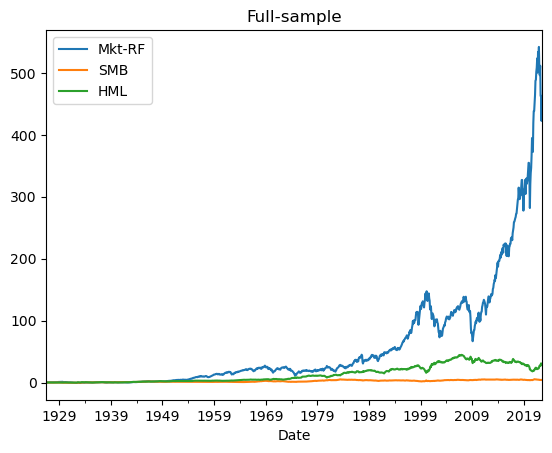

In [128]:
cum_return = factors.add(1).cumprod()-1
cum_return. plot(title = 'Full-sample')
plt.show()


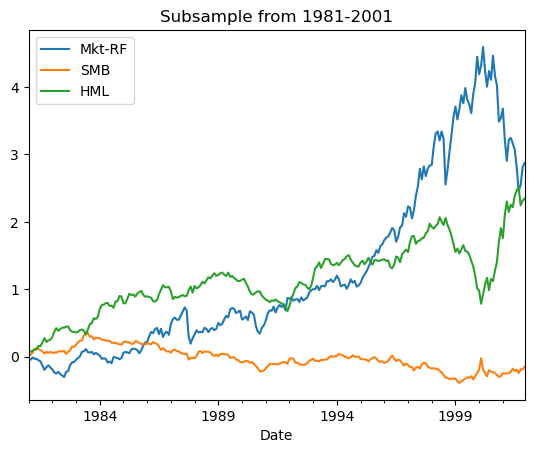

In [136]:
cum_return = factors['1981':'2001'].add(1).cumprod()-1
cum_return. plot(title = 'Subsample from 1981-2001')
plt.show()

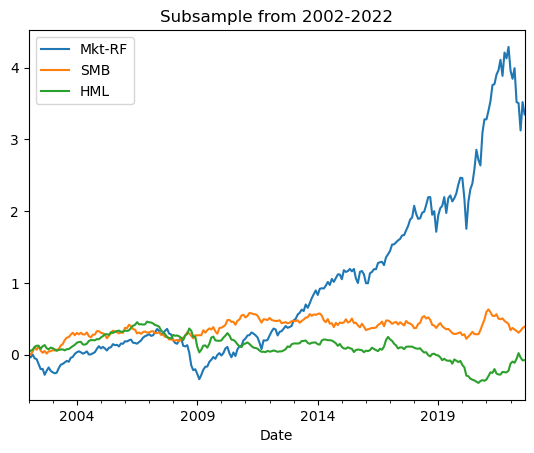

In [137]:
cum_return = factors['2002':'2022'].add(1).cumprod()-1
cum_return. plot(title = 'Subsample from 2002-2022')
plt.show()

## 5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?
No, since the size factor did not appear to be very valuable in 1981-2001(negative premium), but all three fators have positive premium after 2001. Plus, overall all three factors have small correlations bewteen each other ,therefore it is possible for them to be valuable in DFA's portfolios.
 

# Part 3 CAPM 

In [350]:
#1
portfolios = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 2)
portfolios = portfolios.set_index('Date')
portfolios_ex = portfolios.subtract(df['RF'],axis = 0)
portfolios_ex
#data_summary = cal_performance(portfolios_ex['1981':],12).T
#data_summary["Port_hue"] = range(1,26)
#data_summary

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0560,-0.0192,0.0027,-0.0168,0.0183,0.0099,0.0220,0.0027,-0.0282,-0.0055,...,0.0137,0.0131,0.0108,0.0005,0.0225,0.0323,0.0587,0.0181,0.0289,0.0034
1926-08-31,-0.0227,-0.0828,0.0113,0.0121,0.0815,0.0211,-0.0143,0.0376,0.0025,0.0592,...,0.0108,0.0362,0.0175,0.0192,0.0509,0.0076,0.0394,0.0176,0.0523,0.0751
1926-09-30,-0.0506,-0.0285,-0.0457,-0.0350,0.0063,-0.0288,-0.0149,0.0085,-0.0378,-0.0117,...,0.0086,-0.0076,-0.0199,0.0123,0.0064,-0.0152,0.0342,-0.0014,-0.0098,-0.0266
1926-10-31,-0.0969,-0.0387,-0.0381,0.0312,-0.0287,-0.0313,-0.0359,-0.0539,-0.0834,-0.0164,...,-0.0366,-0.0298,-0.0243,-0.0343,-0.0567,-0.0306,-0.0333,-0.0256,-0.0499,-0.0613
1926-11-30,0.0528,0.0388,0.0215,-0.0476,0.0023,0.0279,-0.0268,0.0270,0.0484,0.0242,...,0.0313,0.0208,0.0342,0.0462,0.0151,0.0398,0.0222,0.0121,0.0335,0.0225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.1616,-0.1325,-0.1000,-0.0635,-0.0411,-0.1820,-0.1208,-0.0855,-0.0630,-0.0598,...,-0.1074,-0.0805,-0.0484,-0.0569,-0.0706,-0.1087,-0.0922,-0.0716,-0.0553,-0.0743
2022-05-31,-0.0586,-0.0359,-0.0101,-0.0018,0.0293,-0.0332,-0.0285,0.0198,0.0401,0.0572,...,-0.0298,0.0111,0.0403,0.0086,0.0826,-0.0304,-0.0035,0.0278,0.0644,0.0637
2022-06-30,-0.0671,-0.0433,-0.0431,-0.0663,-0.0994,-0.0211,-0.0630,-0.0685,-0.0628,-0.1303,...,-0.0735,-0.0957,-0.1123,-0.1016,-0.1330,-0.0787,-0.0559,-0.0884,-0.1216,-0.1224


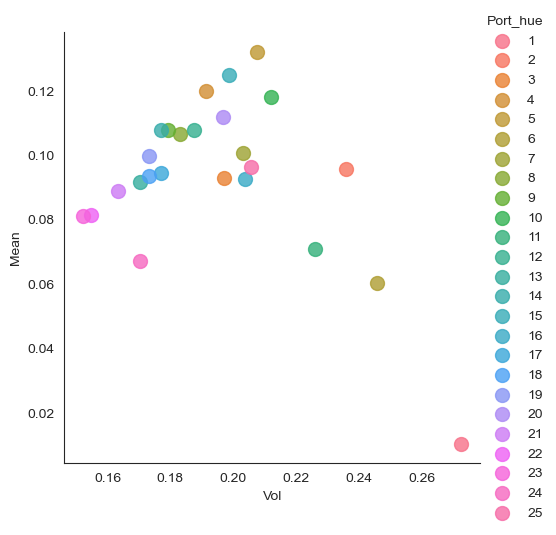

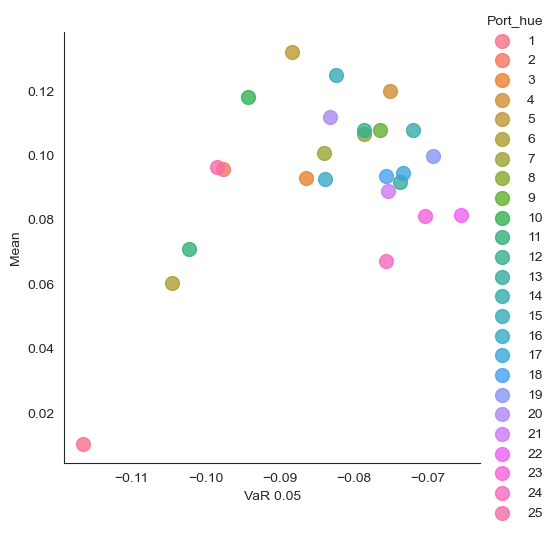

In [278]:
#sns.set_style("white")
#ax = sns.lmplot('Vol', 
               #'Mean', 
               #hue='portfolio_index',palette="Set1",scatter_kws={"s": 300},
               # data=port_summary,
               #fit_reg=True, # Don't fix a regression line
               ##markers=markers,
               #aspect =1) # size and dimension
#ax.fig.set_figwidth(16)
#ax.fig.set_figheight(7)
#plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
#plt.xlabel('Volatility', fontsize=16)
#plt.ylabel('Mean', fontsize=16)

sns.set_style('white')
ax1 = sns.lmplot('Vol','Mean',data =data_summary,hue = 'Port_hue',scatter_kws = {'s':100},fit_reg = False)
ax2 = sns.lmplot('VaR 0.05','Mean',data =data_summary,hue = 'Port_hue',scatter_kws = {'s':100},fit_reg = False)
#def label_point(x, y, val, ax):
    #a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #for i, point in a.iterrows():
        #ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                #horizontalalignment='center', verticalalignment='bottom')

#label_point(data_summary.Vol, data_summary.Mean,data_summary.Port_hue, plt.gca())


### Observe from above graphs, there is no strong correlation between mean and vol, nor between mean and Var.

## 2. Run 25 regression to test CAPM

In [337]:
#2a)b)
capm_data = portfolios_ex.join(df['Mkt-RF'])["1981":]
capm_report = pd.DataFrame(index=portfolios_ex.columns)
x= sm.add_constant(capm_data['Mkt-RF'])
for portf in portfolios_ex.columns:
    y = capm_data[portf]
    res = sm.OLS(y, x, missing='drop').fit()
    capm_report.loc[portf, 'alpha'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
capm_report

,alpha,beta,info_ratio,treynor_ratio
SMALL LoBM,-0.0987,1.3600,-0.5750,0.0077
ME1 BM2,0.0018,1.1702,0.0122,0.0818
ME1 BM3,0.0097,1.0365,0.0857,0.0896
ME1 BM4,0.0425,0.9652,0.3585,0.1243
SMALL HiBM,0.0526,0.9907,0.3778,0.1333
ME2 BM1,-0.0475,1.3433,-0.3677,0.0449
ME2 BM2,0.0101,1.1286,0.0984,0.0892
ME2 BM3,0.0248,1.0193,0.2712,0.1046
ME2 BM4,0.0303,0.9654,0.3094,0.1116
ME2 BM5,0.0292,1.1086,0.2363,0.1066


### 2c) If CAPM were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If CAPM were true, then Alphas would be zero, so does the IR (since no error), the Treynor Ratios = mean excess market return.

## 3. Cross-sectional Estimation


In [342]:
#3a) 

x= sm.add_constant(capm_report['beta'])
y = portfolios_ex['1981':].mean()
res = sm.OLS(y,x,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00950
Time:                        12:34:11   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta          -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
#3a)Report the R-squared of this regression.
res.rsquared


0.25824511921363413

In [345]:
#3b)Report the intercept.
res.params[0]*12

0.19798077049490984

In [346]:
#3c)Report the regression coefficient
res.params[1]*12

-0.09815760379979335

## What would these three statistics be if (CAPM) were true?
R-squared would be 1, intercept = 0 and coefficient = mean excess market return.

### 4. Broadly speaking, do these results support DFA's belief in size and value portfolios containing premia unrelated to the CAPM?
It is clear that CAPM cannot explain all the return wrt the risks. But it is not certain that size and value factors can explain the remianing return(or loss).
